## Tailles

Imports nécessaires :

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import os

import seaborn as sns
#Palettes : https://chrisalbon.com/python/data_visualization/seaborn_color_palettes/

#Fichier personnel contenant les fonctions nécessaires à l'affichage des différentes statistiques sur les contributions:
import Affichage_stats as A_stats

Options d'affichages pandas :

In [2]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_colwidth', 500)

## Imports contributions

Création d'un dictionnaire pour faciliter l'affichage :

In [3]:
themes = {
    'data_fisc.csv':'La fiscalité et les dépenses publiques',
    'data_serv_pub.csv':"Organisation de l'état et des services publics",
    'data_dem.csv':'Démocratie et citoyenneté',
    'data_ecolo.csv':'La transition écologique'
}

In [4]:
filenames = list(themes.keys())
themes = list(themes.values())

In [5]:
filepaths = [os.path.join('Donnees_clean/contributions/',filename) for filename in filenames]

Définition des colonnes qui sont des dates:

In [6]:
col_date = ['createdAt', 'publishedAt', 'updatedAt']

In [7]:
df_list = [pd.read_csv(filepath, low_memory=False,
                       dtype={'authorZipCode':'str'},
                       parse_dates=col_date) for filepath in filepaths]

Colonnes communes à tous les datasets (tous les thèmes):

Cela permettra d'extraire les questions de chaque thème, puisque les seules colonnes qui ne sont pas en commun à tous les thèmes sont les colonnes qui correspondent aux questions.

In [8]:
col_common = set.intersection(*[set(df.columns) for df in df_list])
print('Colonnes en commun pour tous les thèmes: ', col_common)

Colonnes en commun pour tous les thèmes:  {'trashed', 'reference', 'updatedAt', 'authorId', 'trashedStatus', 'authorZipCode', 'authorType', 'publishedAt', 'title', 'createdAt'}


On affiche des informations générales sur les thèmes:

In [9]:
df_infos = pd.DataFrame({
     'theme': themes,
     'nb_contributions': [df.shape[0] for df in df_list],
     'nb_questions': [sum(~df.columns.isin(col_common)) for df in df_list]
    })
df_infos

,theme,nb_contributions,nb_questions
0,La fiscalité et les dépenses publiques,113521,8
1,Organisation de l'état et des services publics,67301,33
2,Démocratie et citoyenneté,65758,37
3,La transition écologique,35982,16


## Taille des titres : 

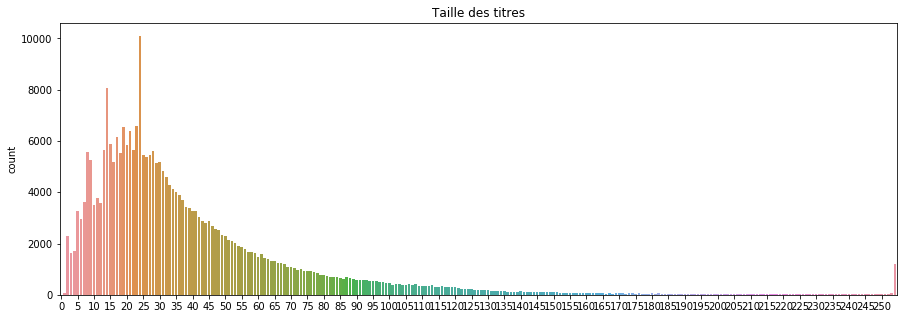

Taille moyenne des titres: 40.88 caractères


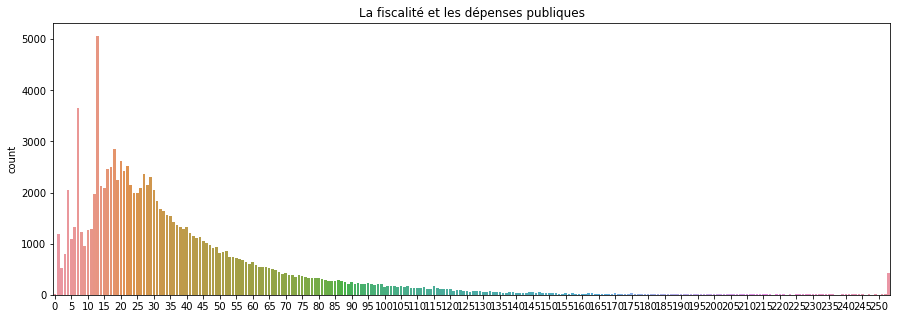

Taille moyenne des titres: 40.44 caractères


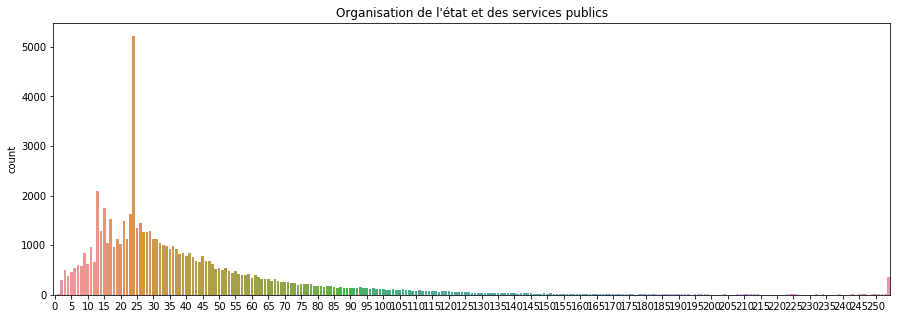

Taille moyenne des titres: 42.11 caractères


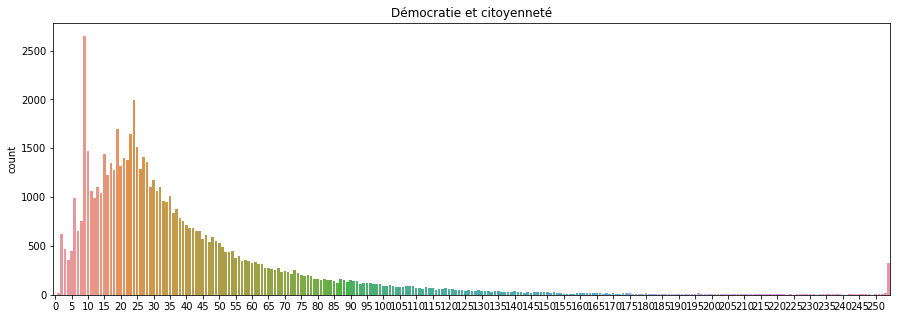

Taille moyenne des titres: 40.39 caractères


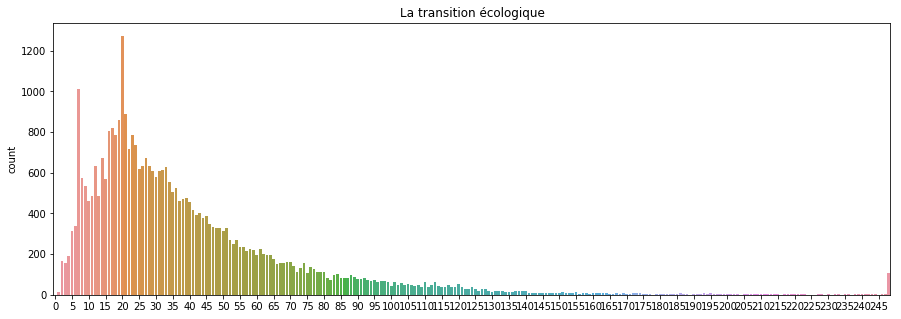

Taille moyenne des titres: 40.86 caractères


In [10]:
A_stats.Len_titles(df_list, themes)

## Réponses aux questions : 

In [16]:
questions=A_stats.questions_themes(df_list, themes, col_common)

In [11]:
pd.set_option('display.max_rows', 100)
questions

,old_name,df_id,theme,new_name,question,nbrow,nbnnull,nbunique,nnull_rate,unique_rate,closed
0,QUXVlc3Rpb246MTYy - Quelles sont toutes les choses qui pourraient être faites pour améliorer l'information des citoyens sur l'utilisation des impôts ?,0,La fiscalité et les dépenses publiques,Q1,Quelles sont toutes les choses qui pourraient être faites pour améliorer l'information des citoyens sur l'utilisation des impôts ?,113521,79059,76394,69.642621,96.629100,False
1,QUXVlc3Rpb246MTYz - Que faudrait-il faire pour rendre la fiscalité plus juste et plus efficace ?,0,La fiscalité et les dépenses publiques,Q2,Que faudrait-il faire pour rendre la fiscalité plus juste et plus efficace ?,113521,93772,91220,82.603219,97.278505,False
2,QUXVlc3Rpb246MTY0 - Quels sont selon vous les impôts qu'il faut baisser en priorité ?,0,La fiscalité et les dépenses publiques,Q3,Quels sont selon vous les impôts qu'il faut baisser en priorité ?,113521,85659,66181,75.456523,77.261000,False
3,"QUXVlc3Rpb246MjA2 - Afin de financer les dépenses sociales, faut-il selon vous...",0,La fiscalité et les dépenses publiques,Q4,"Afin de financer les dépenses sociales, faut-il selon vous...",113521,94318,54596,83.084187,57.885027,False
4,"QUXVlc3Rpb246MjA1 - S'il faut selon vous revoir les conditions d'attribution de certaines aides sociales, lesquelles doivent être concernées ?",0,La fiscalité et les dépenses publiques,Q5,"S'il faut selon vous revoir les conditions d'attribution de certaines aides sociales, lesquelles doivent être concernées ?",113521,75953,67616,66.906564,89.023475,False
5,QUXVlc3Rpb246MTY1 - Quels sont les domaines prioritaires où notre protection sociale doit être renforcée ?,0,La fiscalité et les dépenses publiques,Q6,Quels sont les domaines prioritaires où notre protection sociale doit être renforcée ?,113521,79316,60431,69.869011,76.190176,False
6,"QUXVlc3Rpb246MTY2 - Pour quelle(s) politique(s) publique(s) ou pour quels domaines d'action publique, seriez-vous prêts à payer plus d'impôts ?",0,La fiscalité et les dépenses publiques,Q7,"Pour quelle(s) politique(s) publique(s) ou pour quels domaines d'action publique, seriez-vous prêts à payer plus d'impôts ?",113521,79810,59886,70.304173,75.035710,False
7,QUXVlc3Rpb246MTY3 - Y a-t-il d'autres points sur les impôts et les dépenses sur lesquels vous souhaiteriez vous exprimer ?,0,La fiscalité et les dépenses publiques,Q8,Y a-t-il d'autres points sur les impôts et les dépenses sur lesquels vous souhaiteriez vous exprimer ?,113521,80287,77447,70.724359,96.462690,False
8,QUXVlc3Rpb246MTY5 - Que pensez-vous de l'organisation de l'Etat et des administrations en France ? De quelle manière cette organisation devrait-elle évoluer ?,1,Organisation de l'état et des services publics,Q9,Que pensez-vous de l'organisation de l'Etat et des administrations en France ? De quelle manière cette organisation devrait-elle évoluer ?,67301,49715,47910,73.869630,96.369305,False
9,"QUXVlc3Rpb246MTcw - Selon vous, l'Etat doit-il aujourd'hui transférer de nouvelles missions aux collectivités territoriales ?",1,Organisation de l'état et des services publics,Q10,"Selon vous, l'Etat doit-il aujourd'hui transférer de nouvelles missions aux collectivités territoriales ?",67301,46516,2,69.116358,0.004300,True


In [12]:
questions.groupby(['theme']).agg({'question':'count', 'closed':'sum',
                                  'nbrow':'mean', 'nnull_rate':'mean'})

,question,closed,nbrow,nnull_rate
theme,,,,
Démocratie et citoyenneté,37,7.0,65758,65.751161
La fiscalité et les dépenses publiques,8,0.0,113521,73.573832
La transition écologique,16,4.0,35982,76.248194
Organisation de l'état et des services publics,33,8.0,67301,37.369340


Questions qui ont été le plus répondues:

In [13]:
questions.sort_values('nnull_rate').head(4)

,old_name,df_id,theme,new_name,question,nbrow,nbnnull,nbunique,nnull_rate,unique_rate,closed
39,"QUXVlc3Rpb246MjAz - Si vous avez été amené à recruter une personne portant un handicap, pouvez-vous indiquer les éléments de satisfaction et/ou les difficultés rencontrés en précisant, pour chaque point, l'administration concernée :",1,Organisation de l'état et des services publics,Q40,"Si vous avez été amené à recruter une personne portant un handicap, pouvez-vous indiquer les éléments de satisfaction et/ou les difficultés rencontrés en précisant, pour chaque point, l'administration concernée :",67301,4313,1393,6.408523,32.297705,False
21,"QUXVlc3Rpb246MTgy - Si oui, à quelle occasion en avez-vous fait usage ?",1,Organisation de l'état et des services publics,Q22,"Si oui, à quelle occasion en avez-vous fait usage ?",67301,4985,4158,7.407022,83.410231,False
38,"QUXVlc3Rpb246MjAy - Si vous avez été amené à mettre fin à votre activité, pouvez-vous indiquer les éléments de satisfaction et/ou les difficultés rencontrés en précisant, pour chaque point, l'administration concernée :",1,Organisation de l'état et des services publics,Q39,"Si vous avez été amené à mettre fin à votre activité, pouvez-vous indiquer les éléments de satisfaction et/ou les difficultés rencontrés en précisant, pour chaque point, l'administration concernée :",67301,5894,3350,8.757671,56.837462,False
36,"QUXVlc3Rpb246MjAw - Si vous avez été amené à former du personnel, pouvez-vous indiquer les éléments de satisfaction et/ou les difficultés rencontrés en précisant, pour chaque point, l'administration concernée :",1,Organisation de l'état et des services publics,Q37,"Si vous avez été amené à former du personnel, pouvez-vous indiquer les éléments de satisfaction et/ou les difficultés rencontrés en précisant, pour chaque point, l'administration concernée :",67301,6022,3439,8.947861,57.107273,False


In [123]:
def questions_ouvertes_themes(df_list, questions, themes):
    lengths=[]
    # Plotting questions, grouped by theme
    for i in range(len(themes)):
        lengths.extend(countplot_nb_chars(df_list,questions[(questions.closed == False) & (questions.df_id == i)].reset_index(), themes[i]))
    #Plotting pour tous les thèmes:
    fig, ax=plt.subplots(figsize=(15,5))
    plt.title('Tous les thèmes')
    plt.hist(lengths,bins=70, range=(0, 1000))
    plt.show()
    print('Taille moyenne des réponses aux questions: {moy:.2f}'.format(moy=np.mean(lengths)))
    k=280
    count_280 = len([i for i in lengths if i > k])/len(lengths)
    k=140
    count_140 = len([i for i in lengths if i > k])/len(lengths)
    print("Part des contributions plus grandes que la taille d'un tweet (140): {Part140:.2f}%".format(Part140=count_140*100))
    print("Part des contributions plus grandes que la taille d'un tweet (280): {Part280:.2f}%".format(Part280=count_280*100))
    
    return None

In [120]:
def countplot_nb_chars(df_list, questions_df, suptitle):
    # Countplot for each question
    for index, row in questions_df.iterrows():
        lengths=[]
        for rep in df_list[row.df_id].loc[:,row.new_name].dropna().astype('str'):
            lengths.append(len(rep))
            
    fig, ax=plt.subplots(figsize=(15,5))
    plt.title(suptitle)
    plt.hist(lengths,bins=70, range=(0, 1000))
    plt.show()
    print('Taille moyenne des réponses aux questions: {moy:.2f}'.format(moy=np.mean(lengths)))
    k=280
    count_280 = len([i for i in lengths if i > k])/len(lengths)
    k=140
    count_140 = len([i for i in lengths if i > k])/len(lengths)
    print("Part des contributions plus grandes que la taille d'un tweet (140): {Part140:.2f}%".format(Part140=count_140*100))
    print("Part des contributions plus grandes que la taille d'un tweet (280): {Part280:.2f}%".format(Part280=count_280*100))
    return lengths


### Histogrammes des tailles des réponses aux questions 

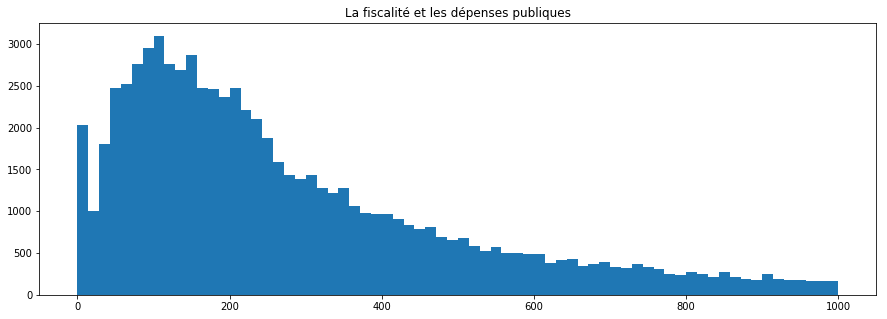

Taille moyenne des réponses aux questions: 466.88
Part des contributions plus grandes que la taille d'un tweet (140): 70.45%
Part des contributions plus grandes que la taille d'un tweet (280): 43.38%


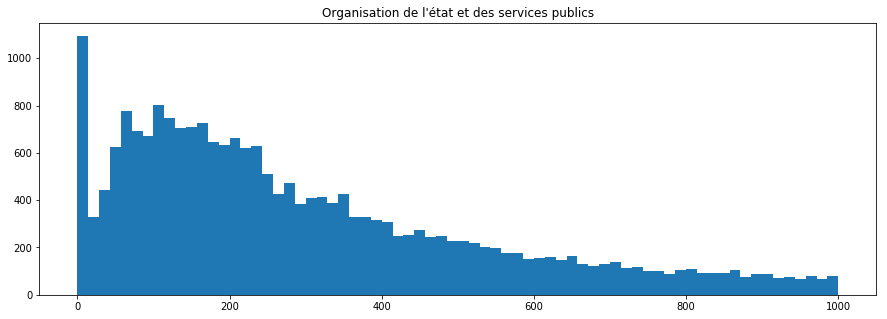

Taille moyenne des réponses aux questions: 693.46
Part des contributions plus grandes que la taille d'un tweet (140): 78.04%
Part des contributions plus grandes que la taille d'un tweet (280): 58.69%


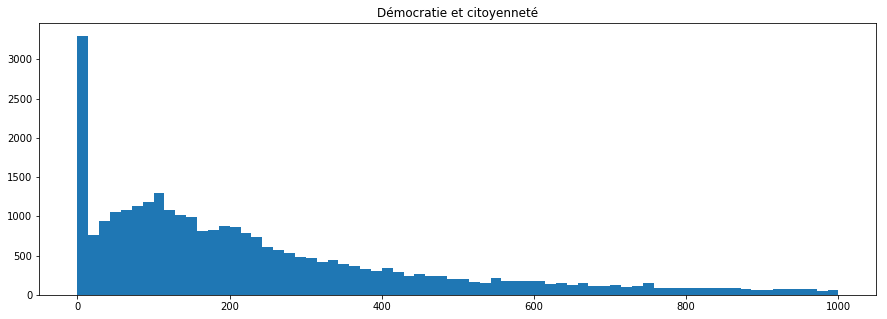

Taille moyenne des réponses aux questions: 466.23
Part des contributions plus grandes que la taille d'un tweet (140): 60.82%
Part des contributions plus grandes que la taille d'un tweet (280): 37.46%


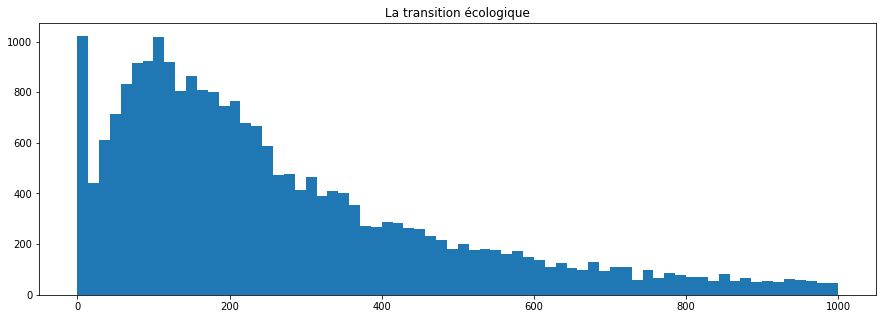

Taille moyenne des réponses aux questions: 405.87
Part des contributions plus grandes que la taille d'un tweet (140): 67.77%
Part des contributions plus grandes que la taille d'un tweet (280): 40.53%


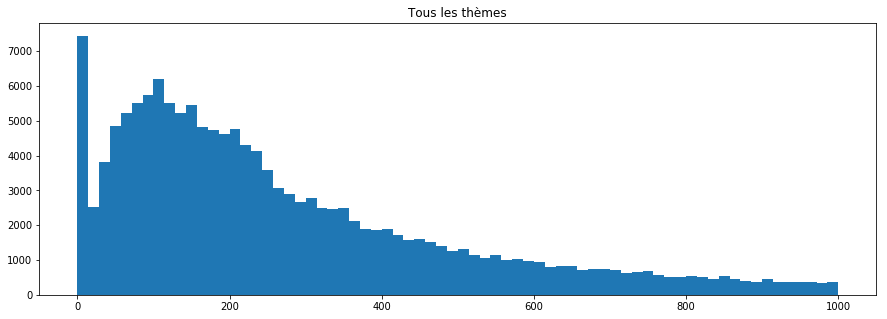

Taille moyenne des réponses aux questions: 499.21
Part des contributions plus grandes que la taille d'un tweet (140): 69.59%
Part des contributions plus grandes que la taille d'un tweet (280): 44.63%


In [124]:
questions_ouvertes_themes(df_list, questions, themes)

## Nombre de réponses aux questions par contributeur : 

### Ecologie : 

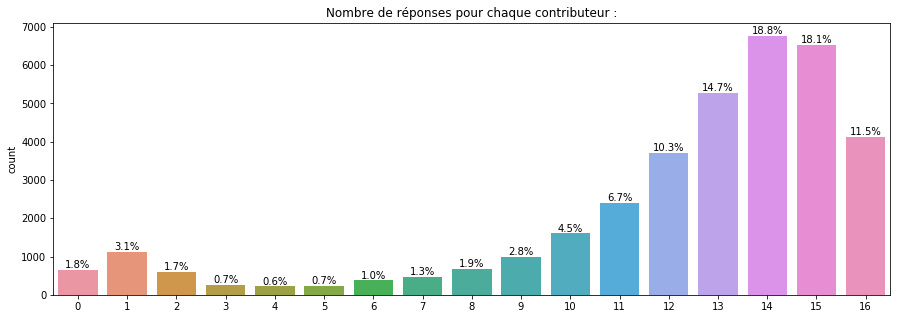

Nombre moyen de réponses : 12.20


In [20]:
stat_n_answers(questions_columns(data_ecolo))

### Services publiques :

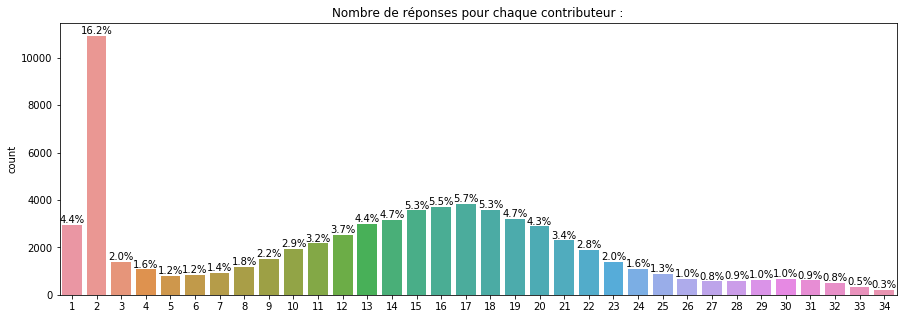

Nombre moyen de réponses : 13.33


In [21]:
stat_n_answers(questions_columns(data_serv_pub))

### Fiscalité :

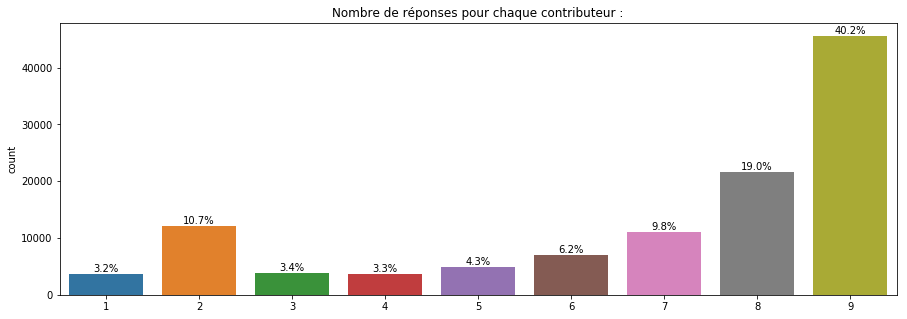

Nombre moyen de réponses : 6.89


In [22]:
stat_n_answers(questions_columns(data_fisc))

### Démocratie :

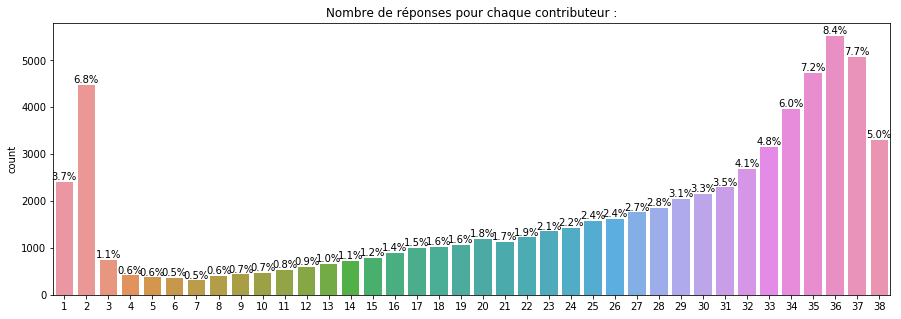

Nombre moyen de réponses : 25.33


In [23]:
stat_n_answers(questions_columns(data_dem))

## Nature des contributeurs :

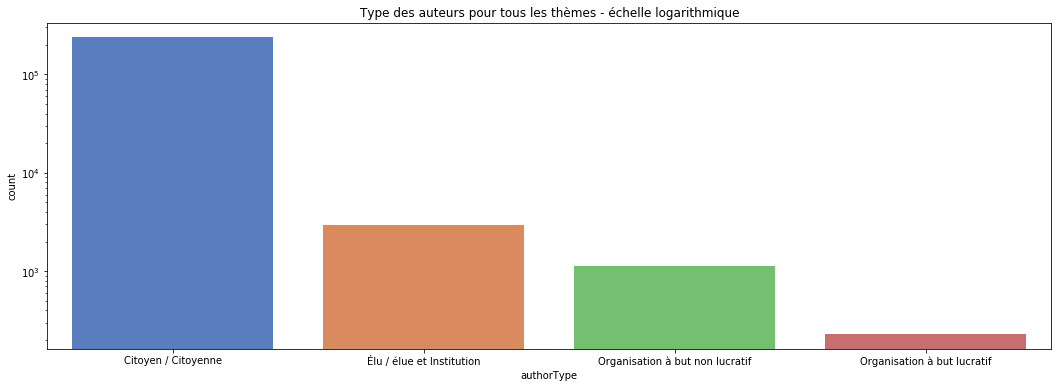

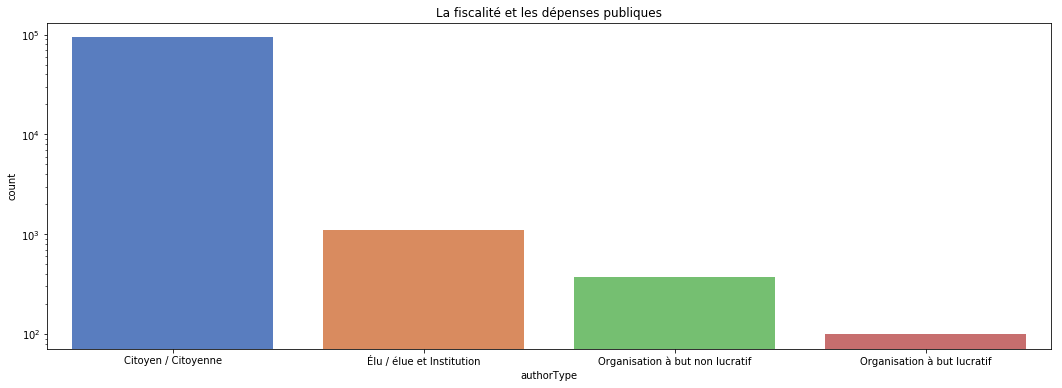

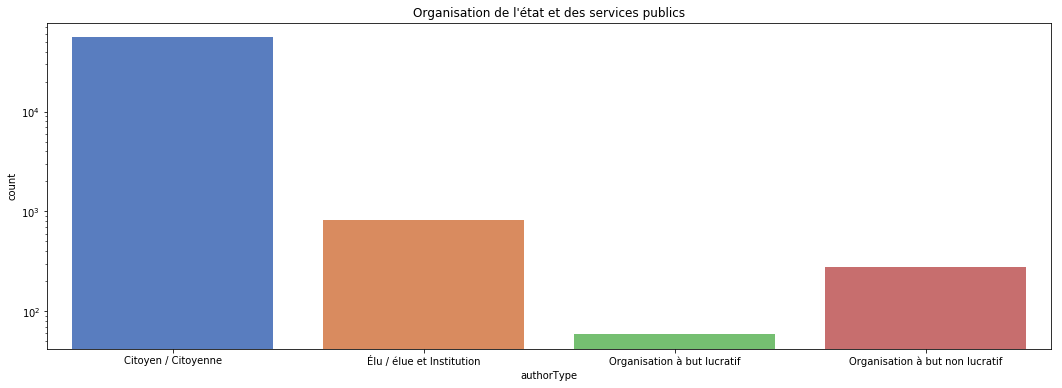

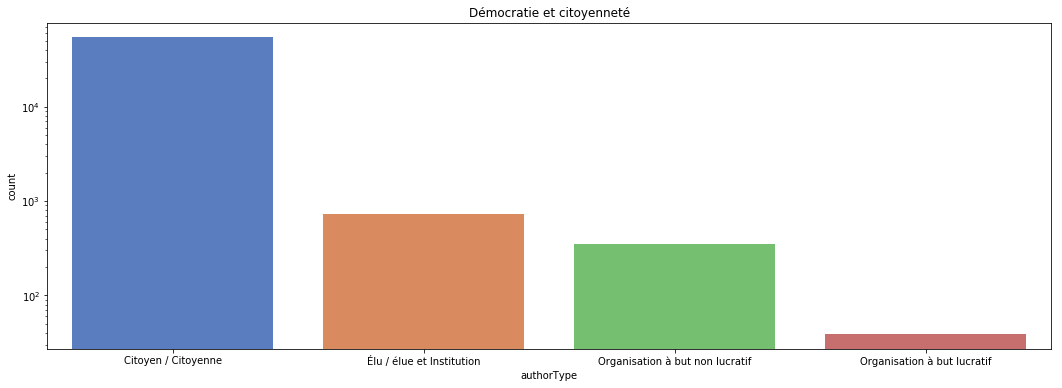

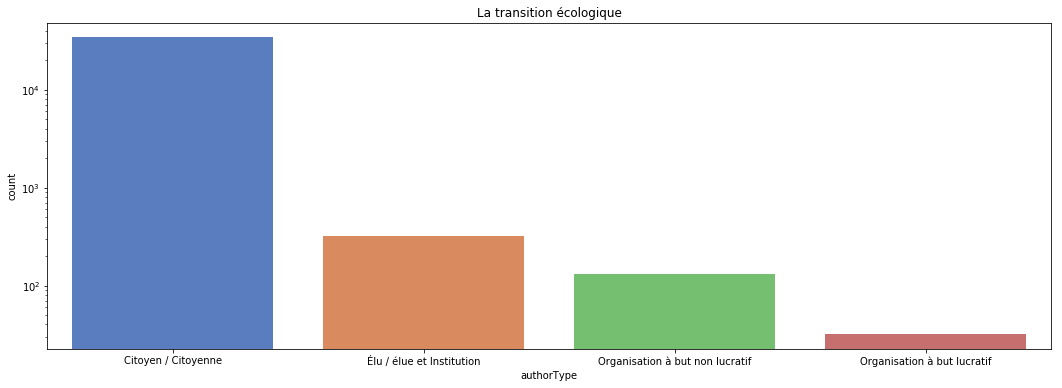

In [14]:
A_stats.Types_auteurs(df_list, themes)

## Questions fermées :

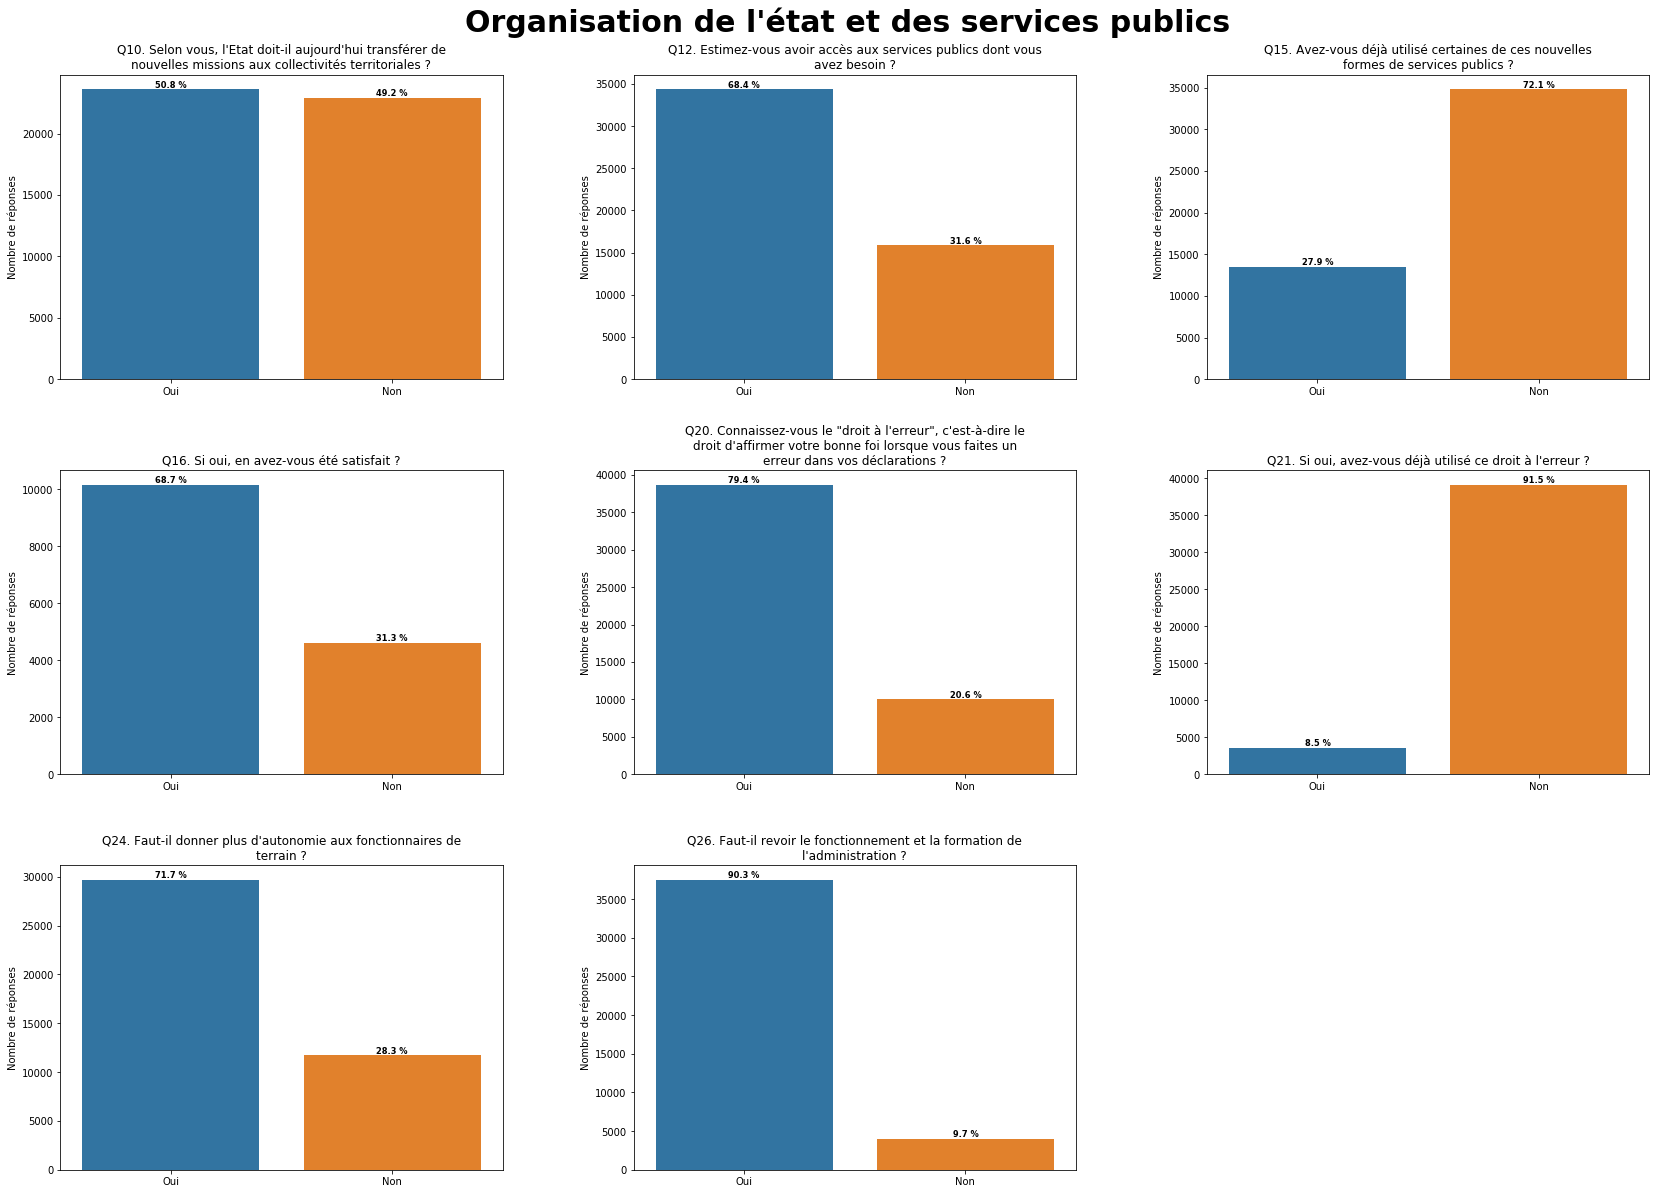

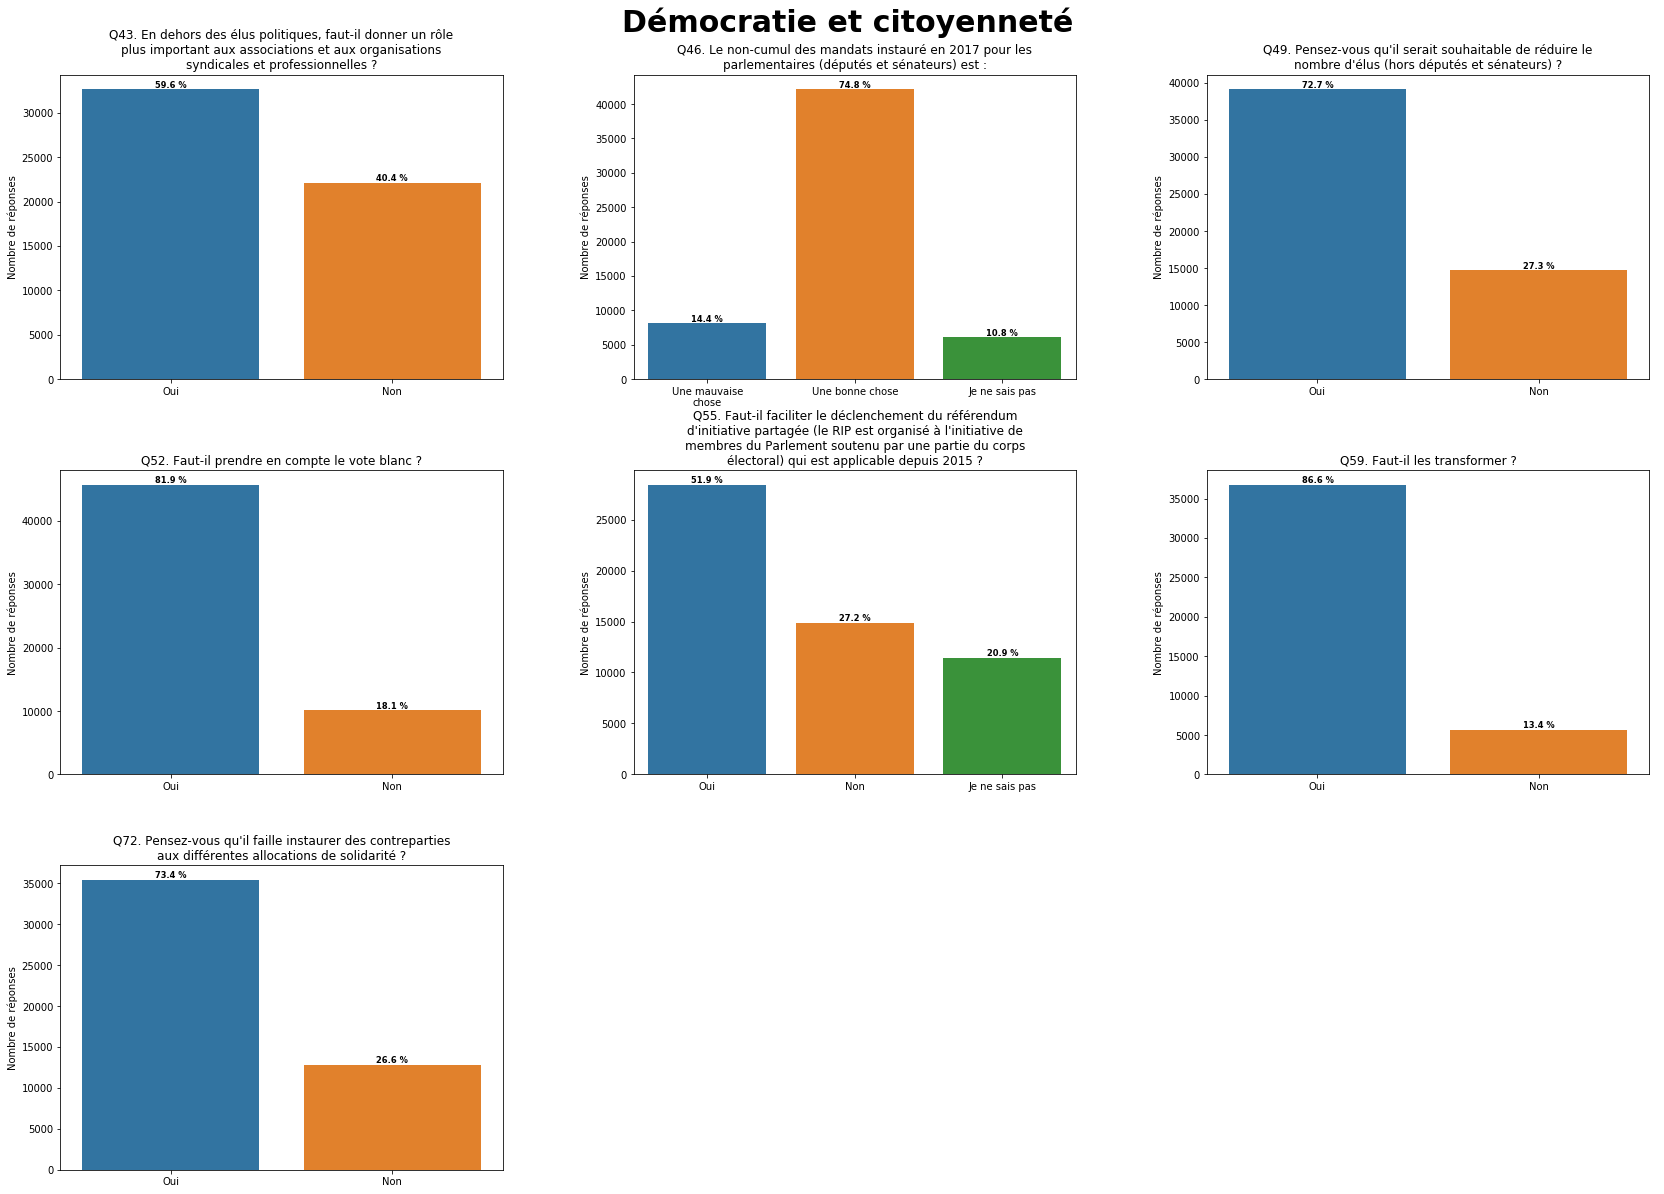

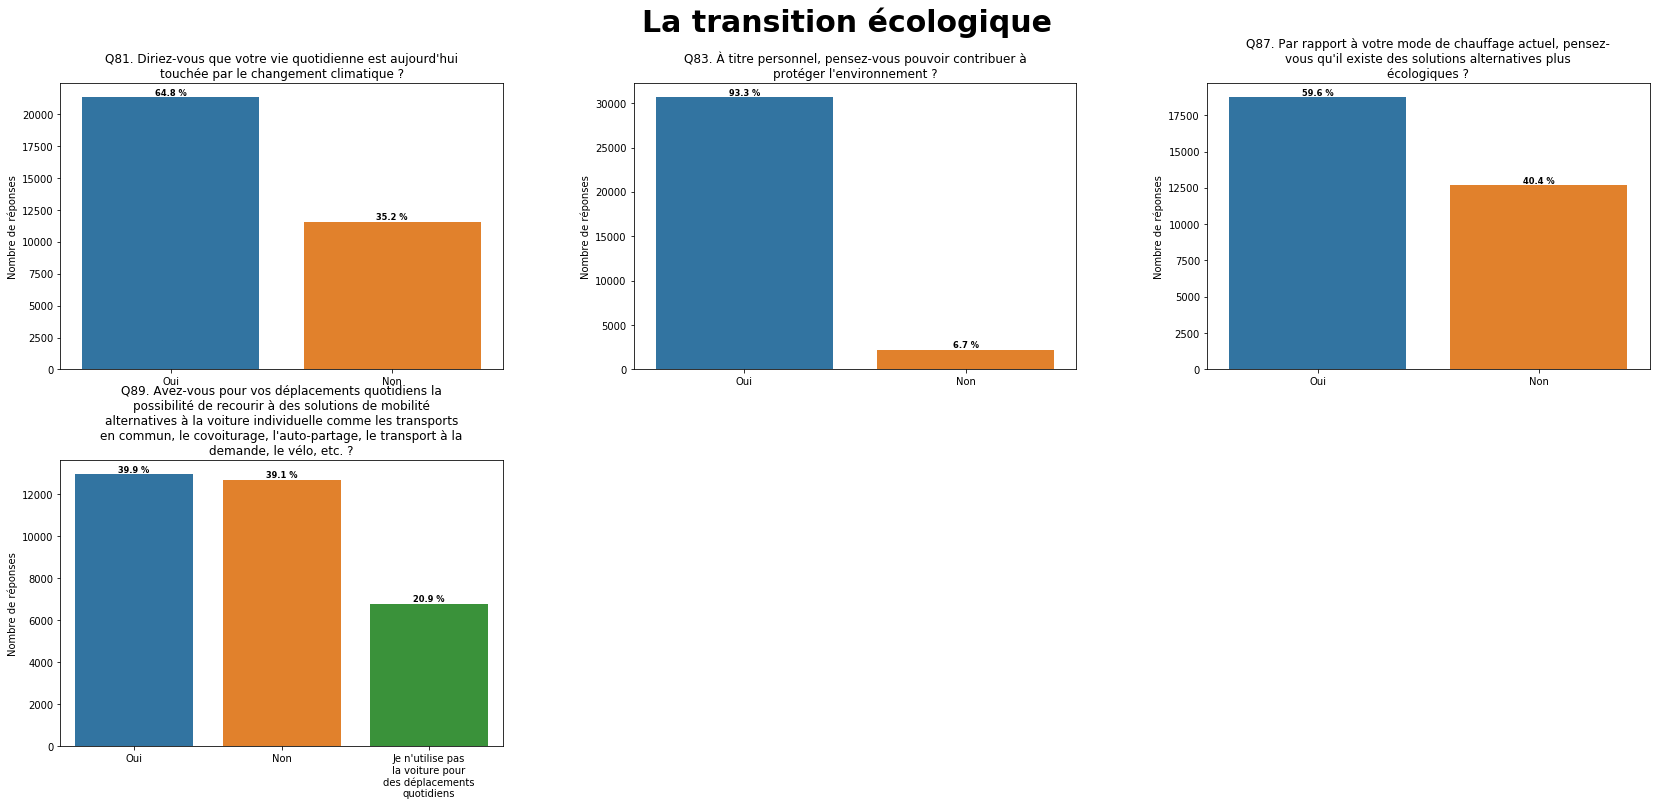

In [12]:
A_stats.questions_fermees_themes(df_list,questions, themes)

## Maximums d'occurences du même authorId pour chaque theme : 

Histogramme du nombre de contributions

Voir si certaines arrivent plusieurs fois pour le même thème

Moyenne du nombre de contributions/pourcentage d'auteurs ayant effectués une contribution pour chaque theme..... 

### Par themes : 

In [68]:
df_max_contrib = pd.DataFrame({
    'theme' : themes,
    'maximum contributions' : [df.groupby('authorId').size().max() for df in df_list]
})
df_max_contrib

,theme,maximum contributions
0,La fiscalité et les dépenses publiques,104
1,Organisation de l'état et des services publics,54
2,Démocratie et citoyenneté,57
3,La transition écologique,38


### Histogrammes du nombre de contributions par auteur et par thème:

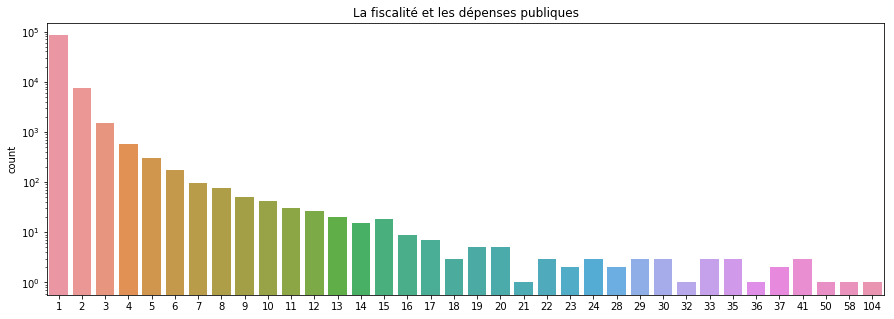

Maximum :  104
Nombre moyen : 1.20
Part d'auteurs n'ayant fait qu'une seule contribution : 88.82 % 


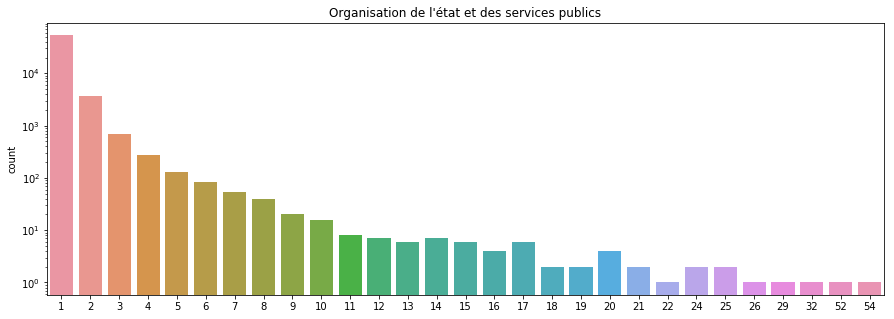

Maximum :  54
Nombre moyen : 1.15
Part d'auteurs n'ayant fait qu'une seule contribution : 91.31 % 


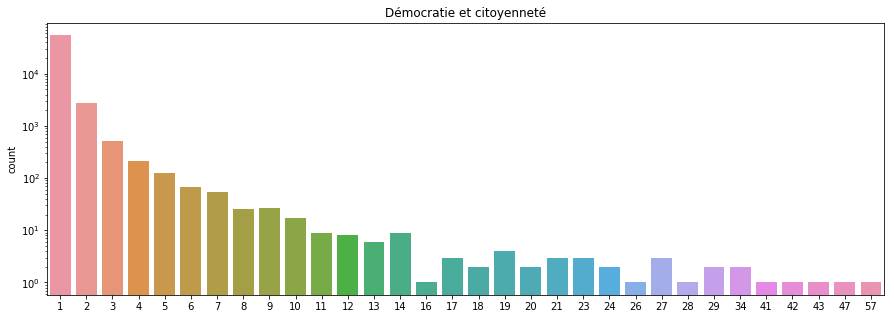

Maximum :  57
Nombre moyen : 1.13
Part d'auteurs n'ayant fait qu'une seule contribution : 93.31 % 


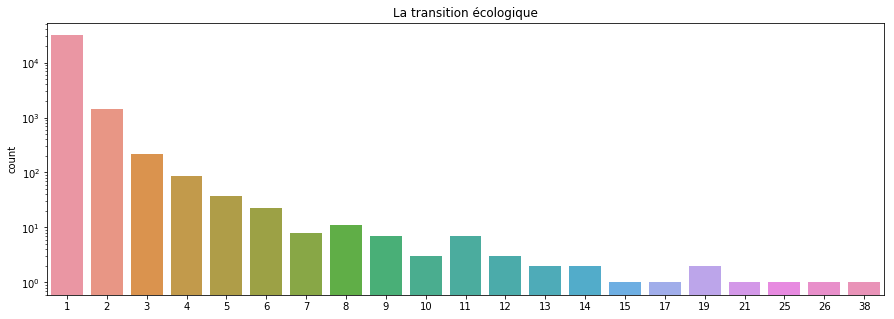

Maximum :  38
Nombre moyen : 1.09
Part d'auteurs n'ayant fait qu'une seule contribution : 94.41 % 


In [83]:
n_contribs_par_auteur_list(df_list, themes)

### Nombre d'authorId dans plusieurs thèmes : 

nombre total de contributions :  282562
nombre d'auteurs uniques :  143348


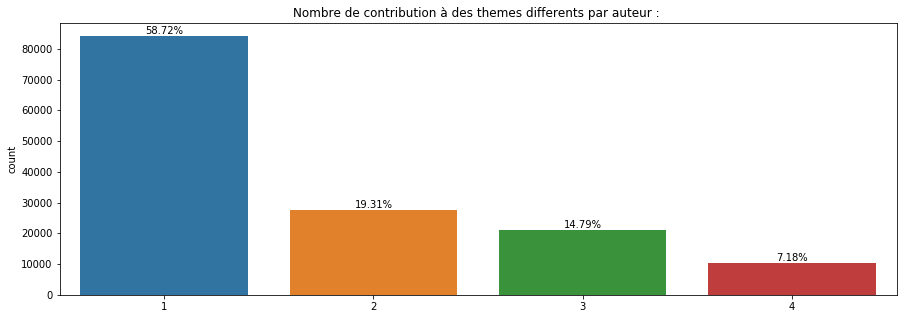

In [10]:
A_stats.auteurs_plusieurs_themes(df_list, themes)

## Résultats aux elections :

### imports des fichiers correspondants :

Création d'un dictionnaire pour faciliter l'affichage :

In [10]:
themes_elec = {
    'data_fisc_elec.csv':'La fiscalité et les dépenses publiques',
    'data_serv_pub_elec.csv':"Organisation de l'état et des services publics",
    'data_dem_elec.csv':'Démocratie et citoyenneté',
    'data_ecolo_elec.csv':'La transition écologique'
}

In [11]:
filenames_elec = list(themes_elec.keys())
themes_elec = list(themes_elec.values())

In [12]:
filepaths_elec = [os.path.join('Donnees_clean/contributions_elections/',filename) for filename in filenames_elec]

Définition des colonnes qui sont des dates:

In [13]:
col_date = ['createdAt', 'publishedAt', 'updatedAt']

In [14]:
df_list_elec = [pd.read_csv(filepath, low_memory=False,
                       dtype={'authorZipCode':'str'},
                       parse_dates=col_date) for filepath in filepaths_elec]

### Affichage des résultats :

par exprimés et en considérant tous les contributeurs:


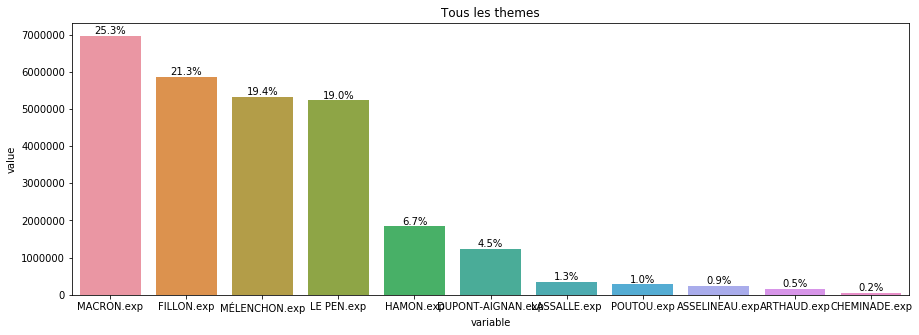

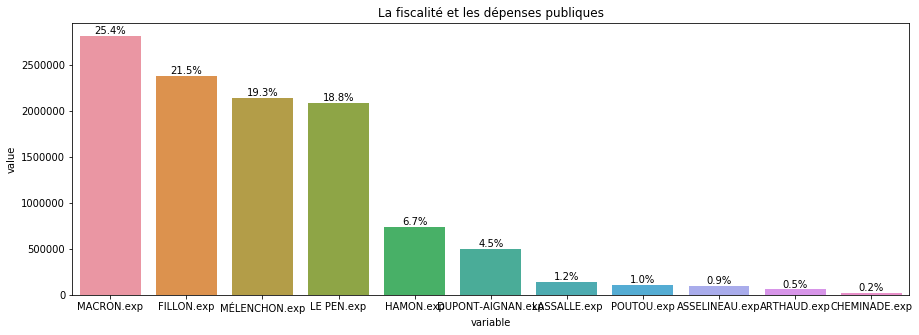

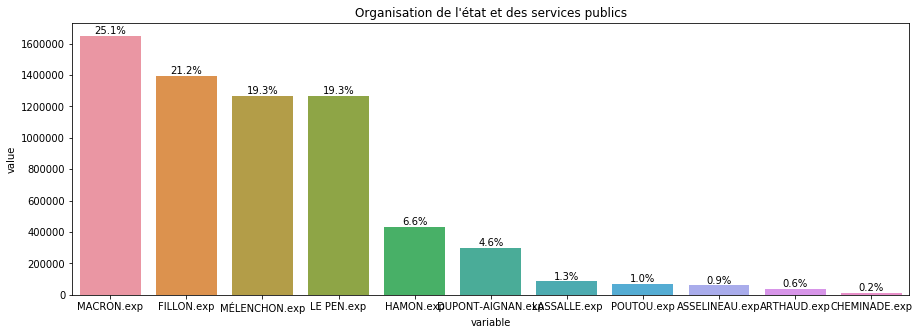

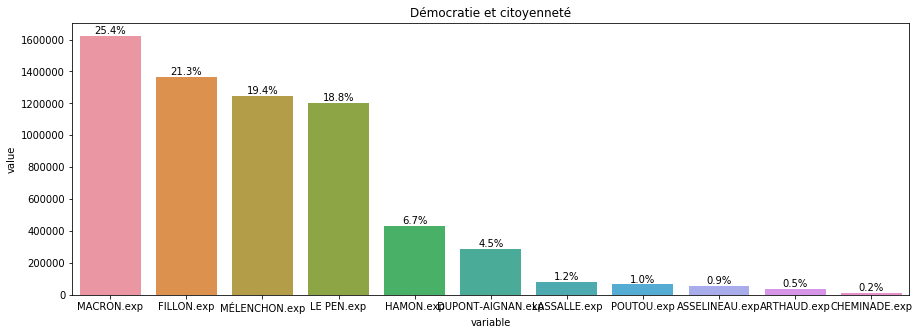

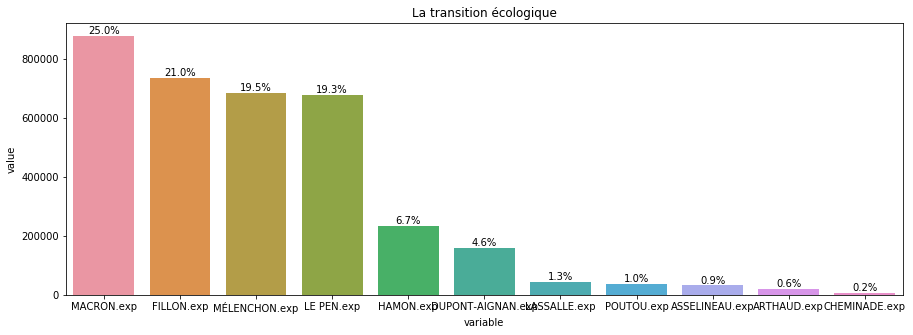

En considérant chaque contributeur unique: 


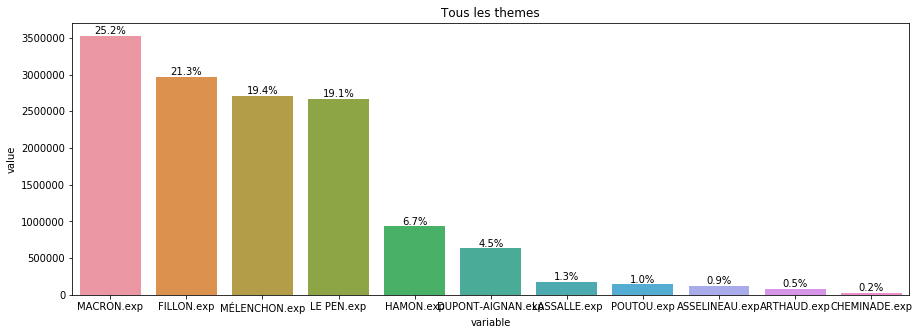

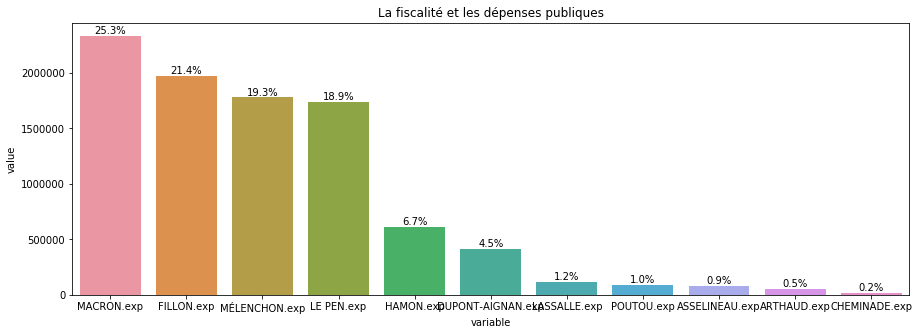

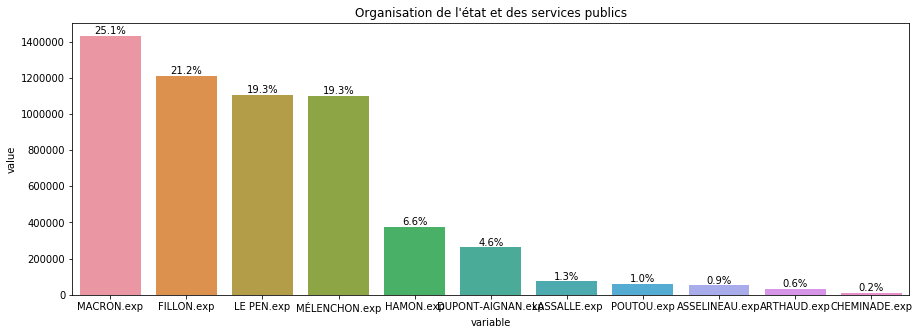

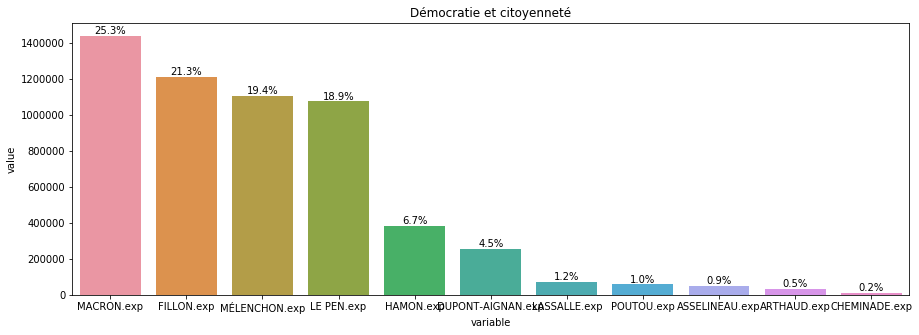

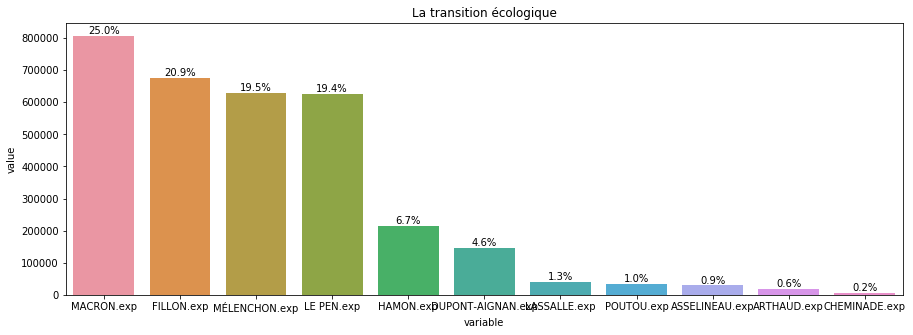

In [15]:
A_stats.resultats_elections(df_list_elec,themes_elec)

## Autres